In [ ]:
!pip install python-telegram-bot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.interpolate import UnivariateSpline, CubicSpline
from datetime import timedelta, datetime
from telegram import Bot
import requests

In [ ]:
file_path = '/content/featureEngineered_weather_data_3months.csv'
df = pd.read_csv(file_path)
df.shape
df

,Timestamp,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,...,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,2023-01-01 00:00:00,2.708150,8.303624,65.730794,8.813310,4.762956,21.290359,64.680303,6.956894,3.286053,...,63.698234,13.031969,3.317918,12.585405,77.721139,2.072463,1.646591,8.457270,74.110728,8.833488
1,2023-01-01 02:00:00,NaN,NaN,NaN,NaN,3.097941,20.703274,77.802238,0.004148,NaN,...,NaN,NaN,1.232735,22.709171,81.294233,6.567073,2.885783,21.036142,71.751609,2.673511
2,2023-01-01 04:00:00,1.113418,16.415794,71.021510,10.627321,2.040952,12.934626,62.622312,3.486289,1.403369,...,75.051629,3.602030,3.390501,6.159643,70.111636,0.865045,2.053294,26.721284,75.453881,13.067526
3,2023-01-01 06:00:00,NaN,NaN,NaN,NaN,0.701376,24.773123,76.138094,4.745556,1.469966,...,83.886154,1.321919,3.385236,13.567607,78.510163,4.183735,0.096831,5.388523,83.646927,6.588268
4,2023-01-01 08:00:00,4.638381,29.806338,71.130219,12.783860,4.164675,15.749365,74.734209,0.072599,1.440918,...,61.299545,9.677885,0.521172,28.715844,61.403166,6.078627,0.303402,8.519926,83.329166,0.358577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2023-03-31 16:00:00,0.796526,36.137271,71.177060,6.060049,0.502154,16.826732,74.740160,13.387706,0.827970,...,78.021349,0.754725,0.628396,37.309186,66.056252,0.444125,NaN,NaN,NaN,NaN
1077,2023-03-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.598338,...,78.746159,2.223118,2.914010,37.294101,71.821907,3.929270,4.742654,37.838278,64.502085,3.980654
1078,2023-03-31 20:00:00,2.587690,30.276396,73.977742,0.418001,4.329834,32.487499,79.642005,11.096420,2.124999,...,79.139859,7.871364,1.499840,29.447308,73.959879,12.673046,3.784025,36.395831,62.622400,14.337802
1079,2023-03-31 22:00:00,NaN,NaN,NaN,NaN,1.182022,35.873391,63.024642,8.736994,3.530400,...,67.954267,9.101979,1.795784,29.519170,73.335830,10.944336,1.988306,32.723057,72.361065,2.959383


In [ ]:
train_dates = pd.to_datetime(df['Timestamp'])
train_dates.tail()

,Timestamp
1076,2023-03-31 16:00:00
1077,2023-03-31 18:00:00
1078,2023-03-31 20:00:00
1079,2023-03-31 22:00:00
1080,2023-04-01 00:00:00


In [ ]:
cols = list(df)[1:]
cols

['Location_1_Rainfall',
 'Location_1_Temperature',
 'Location_1_Humidity',
 'Location_1_Wind_Speed',
 'Location_2_Rainfall',
 'Location_2_Temperature',
 'Location_2_Humidity',
 'Location_2_Wind_Speed',
 'Location_3_Rainfall',
 'Location_3_Temperature',
 'Location_3_Humidity',
 'Location_3_Wind_Speed',
 'Location_4_Rainfall',
 'Location_4_Temperature',
 'Location_4_Humidity',
 'Location_4_Wind_Speed',
 'Location_5_Rainfall',
 'Location_5_Temperature',
 'Location_5_Humidity',
 'Location_5_Wind_Speed']

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training

,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,Location_3_Temperature,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,2.708150,8.303624,65.730794,8.813310,4.762956,21.290359,64.680303,6.956894,3.286053,16.212901,63.698234,13.031969,3.317918,12.585405,77.721139,2.072463,1.646591,8.457270,74.110728,8.833488
1,NaN,NaN,NaN,NaN,3.097941,20.703274,77.802238,0.004148,NaN,NaN,NaN,NaN,1.232735,22.709171,81.294233,6.567073,2.885783,21.036142,71.751609,2.673511
2,1.113418,16.415794,71.021510,10.627321,2.040952,12.934626,62.622312,3.486289,1.403369,28.693545,75.051629,3.602030,3.390501,6.159643,70.111636,0.865045,2.053294,26.721284,75.453881,13.067526
3,NaN,NaN,NaN,NaN,0.701376,24.773123,76.138094,4.745556,1.469966,28.702098,83.886154,1.321919,3.385236,13.567607,78.510163,4.183735,0.096831,5.388523,83.646927,6.588268
4,4.638381,29.806338,71.130219,12.783860,4.164675,15.749365,74.734209,0.072599,1.440918,10.328632,61.299545,9.677885,0.521172,28.715844,61.403166,6.078627,0.303402,8.519926,83.329166,0.358577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0.796526,36.137271,71.177060,6.060049,0.502154,16.826732,74.740160,13.387706,0.827970,27.815447,78.021349,0.754725,0.628396,37.309186,66.056252,0.444125,NaN,NaN,NaN,NaN
1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.598338,30.170322,78.746159,2.223118,2.914010,37.294101,71.821907,3.929270,4.742654,37.838278,64.502085,3.980654
1078,2.587690,30.276396,73.977742,0.418001,4.329834,32.487499,79.642005,11.096420,2.124999,37.938882,79.139859,7.871364,1.499840,29.447308,73.959879,12.673046,3.784025,36.395831,62.622400,14.337802
1079,NaN,NaN,NaN,NaN,1.182022,35.873391,63.024642,8.736994,3.530400,19.907012,67.954267,9.101979,1.795784,29.519170,73.335830,10.944336,1.988306,32.723057,72.361065,2.959383


In [ ]:
def find_missing_values(df):
    return df.isnull().sum()

In [ ]:
missingvalues = find_missing_values(df_for_training)
print(missingvalues)

Location_1_Rainfall       108
Location_1_Temperature    108
Location_1_Humidity       108
Location_1_Wind_Speed     108
Location_2_Rainfall       108
Location_2_Temperature    108
Location_2_Humidity       108
Location_2_Wind_Speed     108
Location_3_Rainfall       108
Location_3_Temperature    108
Location_3_Humidity       108
Location_3_Wind_Speed     108
Location_4_Rainfall       108
Location_4_Temperature    108
Location_4_Humidity       108
Location_4_Wind_Speed     108
Location_5_Rainfall       108
Location_5_Temperature    108
Location_5_Humidity       108
Location_5_Wind_Speed     108
dtype: int64


In [ ]:
def interpolate(df, mask):
    for column in df.columns:
        df[column] = df[column].replace(mask, float('NaN')).interpolate(method='linear')
    return df

mask_value = float("NaN")  # Adjust this to your actual mask value
interpolated_df_for_training = interpolate(df_for_training, mask_value)
interpolated_df_for_training

,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,Location_3_Temperature,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,2.708150,8.303624,65.730794,8.813310,4.762956,21.290359,64.680303,6.956894,3.286053,16.212901,63.698234,13.031969,3.317918,12.585405,77.721139,2.072463,1.646591,8.457270,74.110728,8.833488
1,1.910784,12.359709,68.376152,9.720316,3.097941,20.703274,77.802238,0.004148,2.344711,22.453223,69.374932,8.316999,1.232735,22.709171,81.294233,6.567073,2.885783,21.036142,71.751609,2.673511
2,1.113418,16.415794,71.021510,10.627321,2.040952,12.934626,62.622312,3.486289,1.403369,28.693545,75.051629,3.602030,3.390501,6.159643,70.111636,0.865045,2.053294,26.721284,75.453881,13.067526
3,2.875900,23.111066,71.075865,11.705591,0.701376,24.773123,76.138094,4.745556,1.469966,28.702098,83.886154,1.321919,3.385236,13.567607,78.510163,4.183735,0.096831,5.388523,83.646927,6.588268
4,4.638381,29.806338,71.130219,12.783860,4.164675,15.749365,74.734209,0.072599,1.440918,10.328632,61.299545,9.677885,0.521172,28.715844,61.403166,6.078627,0.303402,8.519926,83.329166,0.358577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,0.796526,36.137271,71.177060,6.060049,0.502154,16.826732,74.740160,13.387706,0.827970,27.815447,78.021349,0.754725,0.628396,37.309186,66.056252,0.444125,4.071087,31.660758,73.592516,7.754224
1077,1.692108,33.206834,72.577401,3.239025,2.415994,24.657116,77.191082,12.242063,1.598338,30.170322,78.746159,2.223118,2.914010,37.294101,71.821907,3.929270,4.742654,37.838278,64.502085,3.980654
1078,2.587690,30.276396,73.977742,0.418001,4.329834,32.487499,79.642005,11.096420,2.124999,37.938882,79.139859,7.871364,1.499840,29.447308,73.959879,12.673046,3.784025,36.395831,62.622400,14.337802
1079,3.292459,33.207857,78.505647,5.467632,1.182022,35.873391,63.024642,8.736994,3.530400,19.907012,67.954267,9.101979,1.795784,29.519170,73.335830,10.944336,1.988306,32.723057,72.361065,2.959383


In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(interpolated_df_for_training)
df_for_training_scaled = scaler.transform(interpolated_df_for_training)
df_for_training_scaled = pd.DataFrame(df_for_training_scaled, columns=interpolated_df_for_training.columns)
df_for_training_scaled

,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,Location_3_Temperature,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,0.186786,-2.025185,-0.964188,0.320755,1.608531,-0.312958,-1.144744,-0.063393,0.569503,-0.990198,-1.238223,1.276030,0.549446,-1.480584,0.763716,-1.258806,-0.651522,-2.002259,0.212173,0.354874
1,-0.389168,-1.503653,-0.580255,0.535932,0.424416,-0.389899,0.754134,-1.737253,-0.081909,-0.192907,-0.414353,0.152503,-0.951997,-0.148007,1.271438,-0.215838,0.212283,-0.380255,-0.122635,-1.121134
2,-0.965123,-0.982121,-0.196321,0.751109,-0.327287,-1.408025,-1.442557,-0.898934,-0.733321,0.604384,0.409516,-0.971025,0.601709,-2.326399,-0.317562,-1.538986,-0.368021,0.352825,0.402795,1.369402
3,0.307955,-0.121242,-0.188432,1.006917,-1.279958,0.143479,0.513316,-0.595769,-0.687236,0.605477,1.691687,-1.514351,0.597918,-1.351298,0.875833,-0.768889,-1.731814,-2.397963,1.565559,-0.183109
4,1.581033,0.739637,-0.180543,1.262725,1.183050,-1.039137,0.310159,-1.720774,-0.707337,-1.741999,-1.586349,0.476788,-1.464360,0.642644,-1.554999,-0.329182,-1.587820,-1.994179,1.520462,-1.675821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,-1.194021,1.553669,-0.173745,-0.332427,-1.421640,-0.897942,0.311020,1.484812,-1.131499,0.492195,0.840517,-1.649508,-1.387152,1.773774,-0.893815,-1.636660,1.038523,0.989754,0.138628,0.096269
1077,-0.547123,1.176873,0.029493,-1.001684,-0.060567,0.128275,0.665694,1.209001,-0.598401,0.793064,0.945710,-1.299605,0.258610,1.771788,-0.074540,-0.827937,1.506653,1.786324,-1.151494,-0.807926
1078,0.099775,0.800077,0.232732,-1.670942,1.300506,1.154492,1.020368,0.933190,-0.233950,1.785610,1.002848,0.046312,-0.759667,0.738925,0.229257,1.201044,0.838421,1.600326,-1.418260,1.673776
1079,0.608845,1.177005,0.889889,-0.472971,-0.938136,1.598233,-1.384335,0.365163,0.738592,-0.518222,-0.620537,0.339555,-0.546571,0.748384,0.140582,0.799900,-0.413322,1.126734,-0.036141,-1.052636


In [ ]:
missingvalues = find_missing_values(interpolated_df_for_training)
print(missingvalues)

Location_1_Rainfall       0
Location_1_Temperature    0
Location_1_Humidity       0
Location_1_Wind_Speed     0
Location_2_Rainfall       0
Location_2_Temperature    0
Location_2_Humidity       0
Location_2_Wind_Speed     0
Location_3_Rainfall       0
Location_3_Temperature    0
Location_3_Humidity       0
Location_3_Wind_Speed     0
Location_4_Rainfall       0
Location_4_Temperature    0
Location_4_Humidity       0
Location_4_Wind_Speed     0
Location_5_Rainfall       0
Location_5_Temperature    0
Location_5_Humidity       0
Location_5_Wind_Speed     0
dtype: int64


In [ ]:
data = df_for_training_scaled.values
window_size = 30
trainX, trainY = [], []
for i in range(len(data) - window_size):
    trainX.append(data[i:i + window_size])
    trainY.append(data[i + window_size])

trainX = np.array(trainX)
trainY = np.array(trainY)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, shuffle=True)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (840, 30, 20)
y_train shape: (840, 20)
X_test shape: (211, 30, 20)
y_test shape: (211, 20)


In [ ]:
start = time.time()
model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(30, 20), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(20, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(20))
model.compile(optimizer='adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])
model.summary()
end = time.time()
print("Total compile time: --------", end - start, 's')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 2.9898 - val_loss: 1.6164
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 2.5542 - val_loss: 1.5964
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.3443 - val_loss: 1.5786
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 2.1575 - val_loss: 1.5587
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2.0525 - val_loss: 1.5401
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.9076 - val_loss: 1.5191
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.8365 - val_loss: 1.4956
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.7428 - val_loss: 1.4758
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 1.6548 - val_loss: 1.4522
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.6259 - val_loss: 1.4250
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.5608 - val_loss: 1.3937
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 20)              │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 20)              │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             420 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,262 (83.06 KB)

 Trainable params: 7,060 (27.58 KB)

 Non-trainable params: 80 (320.00 B)

 Optimizer params: 14,122 (55.17 KB)

Total compile time: -------- 67.71023368835449 s


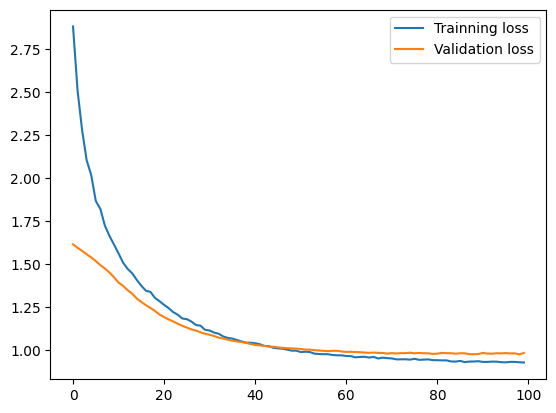

In [ ]:
plt.plot(history.history['loss'], label = 'Trainning loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()

In [ ]:
# Define the window size for forecasting
window_size = 30

# Prepare the last window_size observations from the scaled dataset
last_sequence = df_for_training_scaled.values[-window_size:]

# Reshape for the model input (batch_size, time_steps, features)
input_sequence = np.reshape(last_sequence, (1, window_size, 20))

# Forecast the next time step
num_steps = 5  # Number of future time steps to forecast
forecast_results = []
timestamps = []

# Get the last timestamp from the dataset
last_timestamp = pd.to_datetime(df['Timestamp'].iloc[-1])


for step in range(num_steps):
    next_step = model.predict(input_sequence)
    forecast_results.append(next_step)
    next_timestamp = last_timestamp + pd.DateOffset(hours=2)  # Assuming data is every 2 hours
    timestamps.append(next_timestamp)

    current_input = np.append(input_sequence[:, 1:, :], next_step.reshape(1, 1, 20), axis=1)
    input_sequence = current_input
    last_timestamp = next_timestamp

forecast_results = np.array(forecast_results).reshape(num_steps, 20)
forecast_results_original_scale = scaler.inverse_transform(forecast_results)
forecast_df = pd.DataFrame(forecast_results_original_scale, columns=df_for_training.columns)
forecast_df.insert(0, 'Timestamp', timestamps)
forecast_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


,Timestamp,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,...,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,2023-04-01 02:00:00,2.094092,26.636780,70.055992,6.061189,2.689688,28.201378,72.037483,6.630175,2.351701,...,73.321915,8.394064,2.554915,27.497948,71.059265,6.369300,2.644932,26.866432,72.951683,7.516369
1,2023-04-01 04:00:00,2.052958,26.907009,69.976997,6.201128,2.664983,28.479574,72.001938,6.667788,2.356388,...,73.258667,8.474452,2.465666,27.579016,71.061523,6.395742,2.558305,27.111570,72.983459,7.694198
2,2023-04-01 06:00:00,2.058075,27.350548,69.934708,6.361772,2.630376,28.635162,72.158348,6.737244,2.386231,...,73.046120,8.433493,2.370143,27.379141,70.885071,6.431899,2.458594,27.103310,72.826180,7.728345
3,2023-04-01 08:00:00,2.118249,27.891560,70.045654,6.595273,2.606179,28.658501,72.556168,6.804508,2.447901,...,72.727898,8.239321,2.283656,26.823889,70.477440,6.448427,2.345381,26.785131,72.607193,7.588552
4,2023-04-01 10:00:00,2.124646,28.378597,69.979294,6.664690,2.586634,28.875895,72.647629,6.920639,2.480897,...,72.508698,8.210213,2.188355,26.694996,70.363930,6.508776,2.257843,26.780859,72.361824,7.625467


In [ ]:
assert len(df) == len(interpolated_df_for_training), "The number of rows in df and interpolated_df_for_training must match."
df_with_timestamp = pd.concat([df[['Timestamp']], interpolated_df_for_training], axis=1)
df_with_timestamp

,Timestamp,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,...,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,2023-01-01 00:00:00,2.708150,8.303624,65.730794,8.813310,4.762956,21.290359,64.680303,6.956894,3.286053,...,63.698234,13.031969,3.317918,12.585405,77.721139,2.072463,1.646591,8.457270,74.110728,8.833488
1,2023-01-01 02:00:00,1.910784,12.359709,68.376152,9.720316,3.097941,20.703274,77.802238,0.004148,2.344711,...,69.374932,8.316999,1.232735,22.709171,81.294233,6.567073,2.885783,21.036142,71.751609,2.673511
2,2023-01-01 04:00:00,1.113418,16.415794,71.021510,10.627321,2.040952,12.934626,62.622312,3.486289,1.403369,...,75.051629,3.602030,3.390501,6.159643,70.111636,0.865045,2.053294,26.721284,75.453881,13.067526
3,2023-01-01 06:00:00,2.875900,23.111066,71.075865,11.705591,0.701376,24.773123,76.138094,4.745556,1.469966,...,83.886154,1.321919,3.385236,13.567607,78.510163,4.183735,0.096831,5.388523,83.646927,6.588268
4,2023-01-01 08:00:00,4.638381,29.806338,71.130219,12.783860,4.164675,15.749365,74.734209,0.072599,1.440918,...,61.299545,9.677885,0.521172,28.715844,61.403166,6.078627,0.303402,8.519926,83.329166,0.358577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2023-03-31 16:00:00,0.796526,36.137271,71.177060,6.060049,0.502154,16.826732,74.740160,13.387706,0.827970,...,78.021349,0.754725,0.628396,37.309186,66.056252,0.444125,4.071087,31.660758,73.592516,7.754224
1077,2023-03-31 18:00:00,1.692108,33.206834,72.577401,3.239025,2.415994,24.657116,77.191082,12.242063,1.598338,...,78.746159,2.223118,2.914010,37.294101,71.821907,3.929270,4.742654,37.838278,64.502085,3.980654
1078,2023-03-31 20:00:00,2.587690,30.276396,73.977742,0.418001,4.329834,32.487499,79.642005,11.096420,2.124999,...,79.139859,7.871364,1.499840,29.447308,73.959879,12.673046,3.784025,36.395831,62.622400,14.337802
1079,2023-03-31 22:00:00,3.292459,33.207857,78.505647,5.467632,1.182022,35.873391,63.024642,8.736994,3.530400,...,67.954267,9.101979,1.795784,29.519170,73.335830,10.944336,1.988306,32.723057,72.361065,2.959383


In [ ]:
df_with_timestamp['Timestamp'] = pd.to_datetime(df_with_timestamp['Timestamp'])
forecast_df['Timestamp'] = pd.to_datetime(forecast_df['Timestamp'])
forecast_df

,Timestamp,Location_1_Rainfall,Location_1_Temperature,Location_1_Humidity,Location_1_Wind_Speed,Location_2_Rainfall,Location_2_Temperature,Location_2_Humidity,Location_2_Wind_Speed,Location_3_Rainfall,...,Location_3_Humidity,Location_3_Wind_Speed,Location_4_Rainfall,Location_4_Temperature,Location_4_Humidity,Location_4_Wind_Speed,Location_5_Rainfall,Location_5_Temperature,Location_5_Humidity,Location_5_Wind_Speed
0,2023-04-01 02:00:00,2.094092,26.636780,70.055992,6.061189,2.689688,28.201378,72.037483,6.630175,2.351701,...,73.321915,8.394064,2.554915,27.497948,71.059265,6.369300,2.644932,26.866432,72.951683,7.516369
1,2023-04-01 04:00:00,2.052958,26.907009,69.976997,6.201128,2.664983,28.479574,72.001938,6.667788,2.356388,...,73.258667,8.474452,2.465666,27.579016,71.061523,6.395742,2.558305,27.111570,72.983459,7.694198
2,2023-04-01 06:00:00,2.058075,27.350548,69.934708,6.361772,2.630376,28.635162,72.158348,6.737244,2.386231,...,73.046120,8.433493,2.370143,27.379141,70.885071,6.431899,2.458594,27.103310,72.826180,7.728345
3,2023-04-01 08:00:00,2.118249,27.891560,70.045654,6.595273,2.606179,28.658501,72.556168,6.804508,2.447901,...,72.727898,8.239321,2.283656,26.823889,70.477440,6.448427,2.345381,26.785131,72.607193,7.588552
4,2023-04-01 10:00:00,2.124646,28.378597,69.979294,6.664690,2.586634,28.875895,72.647629,6.920639,2.480897,...,72.508698,8.210213,2.188355,26.694996,70.363930,6.508776,2.257843,26.780859,72.361824,7.625467


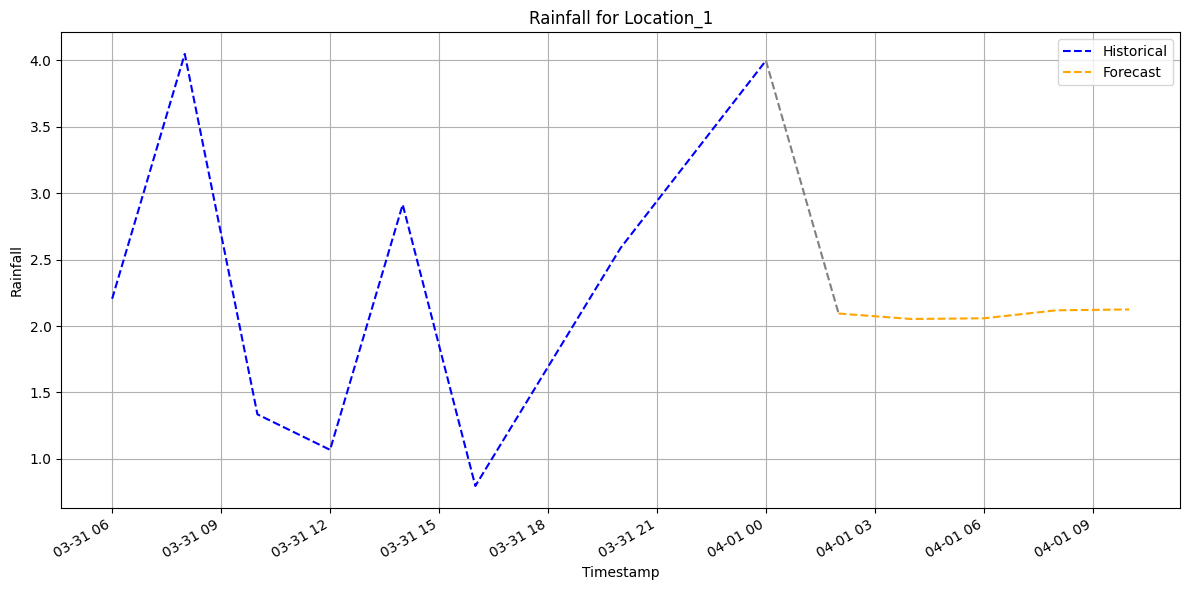

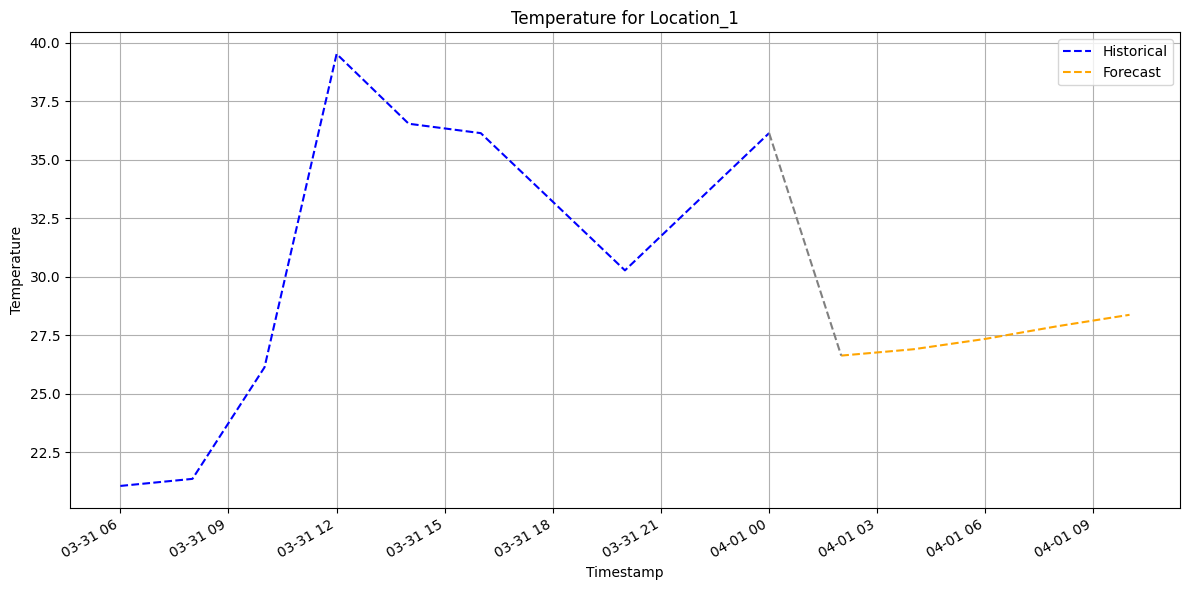

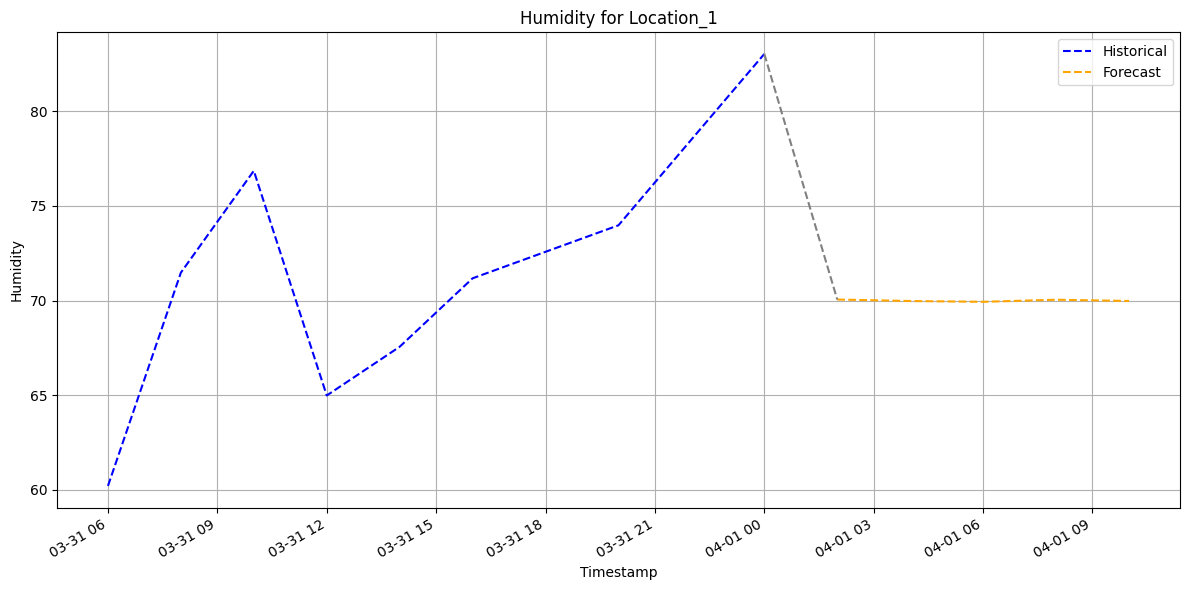

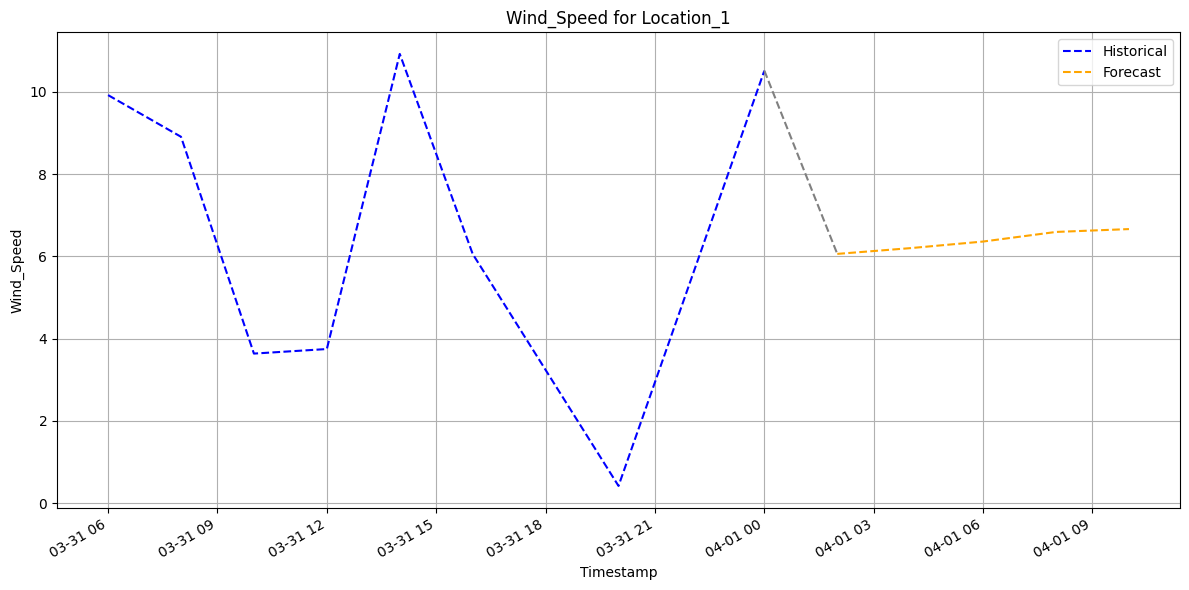

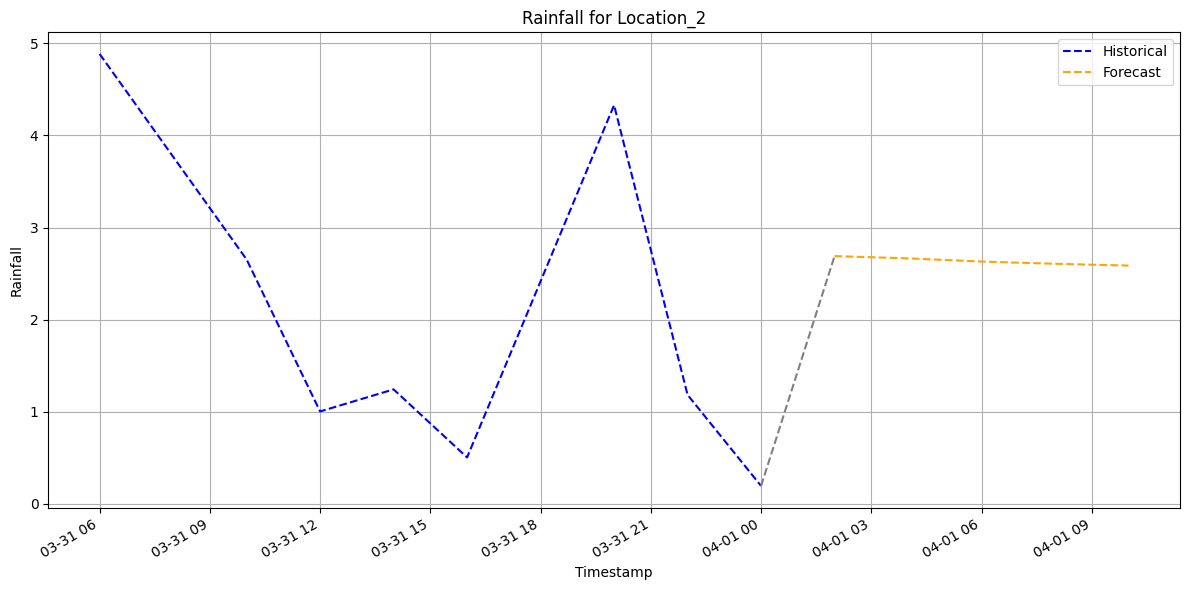

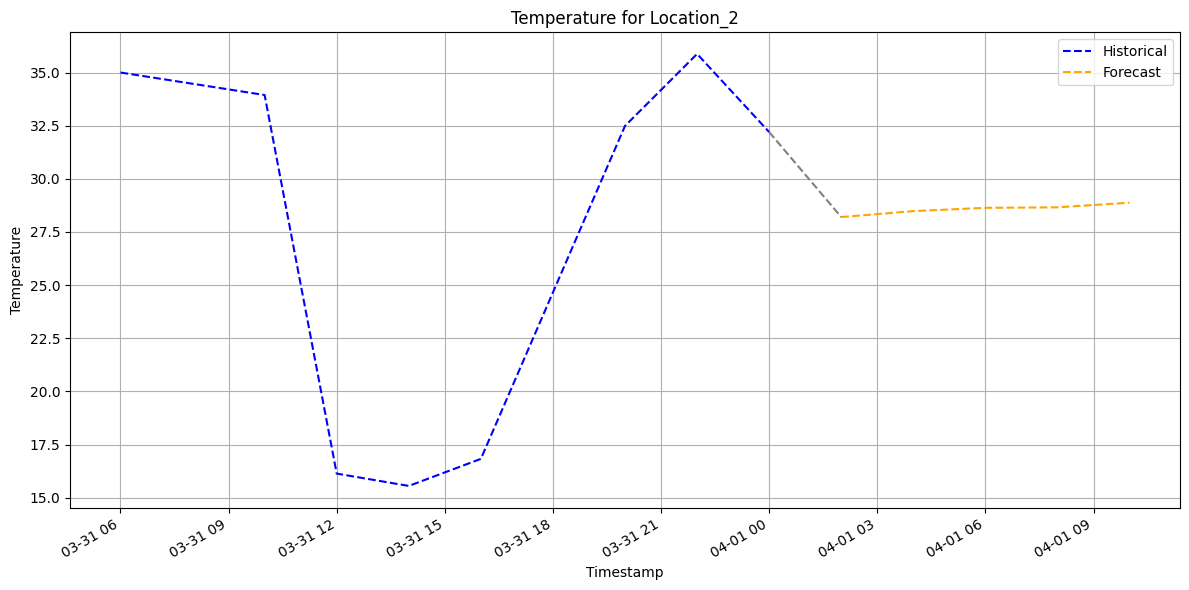

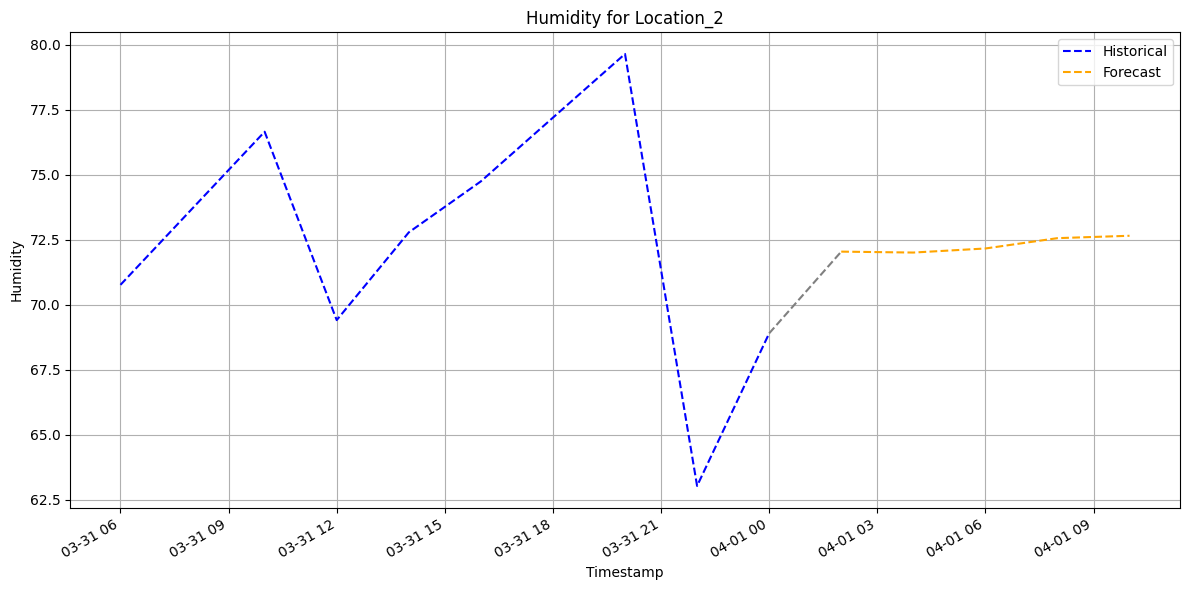

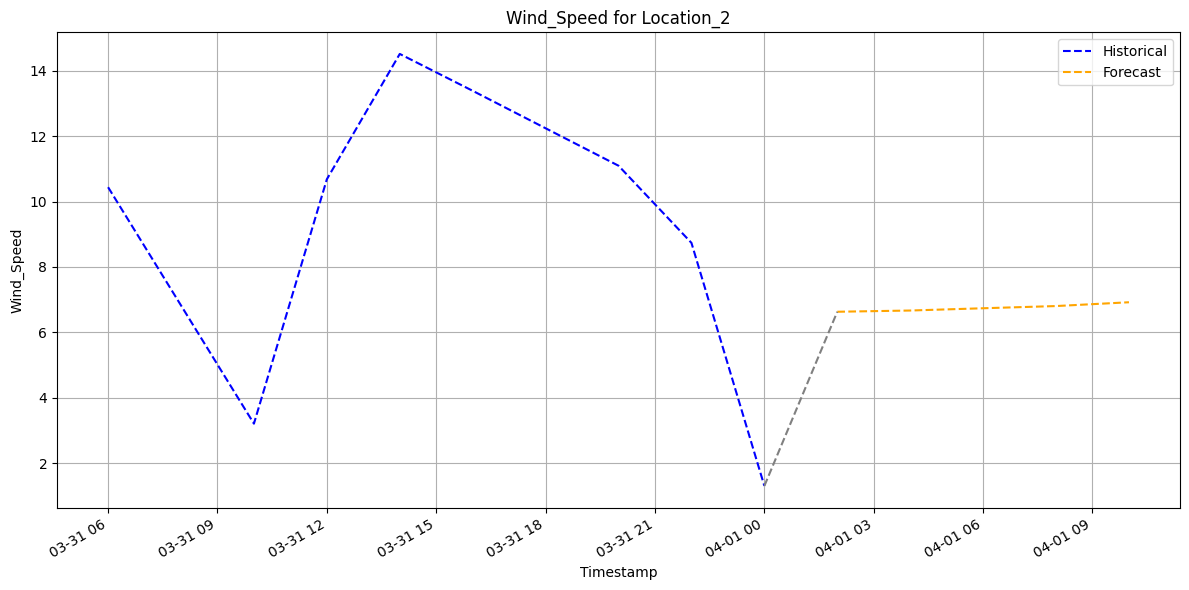

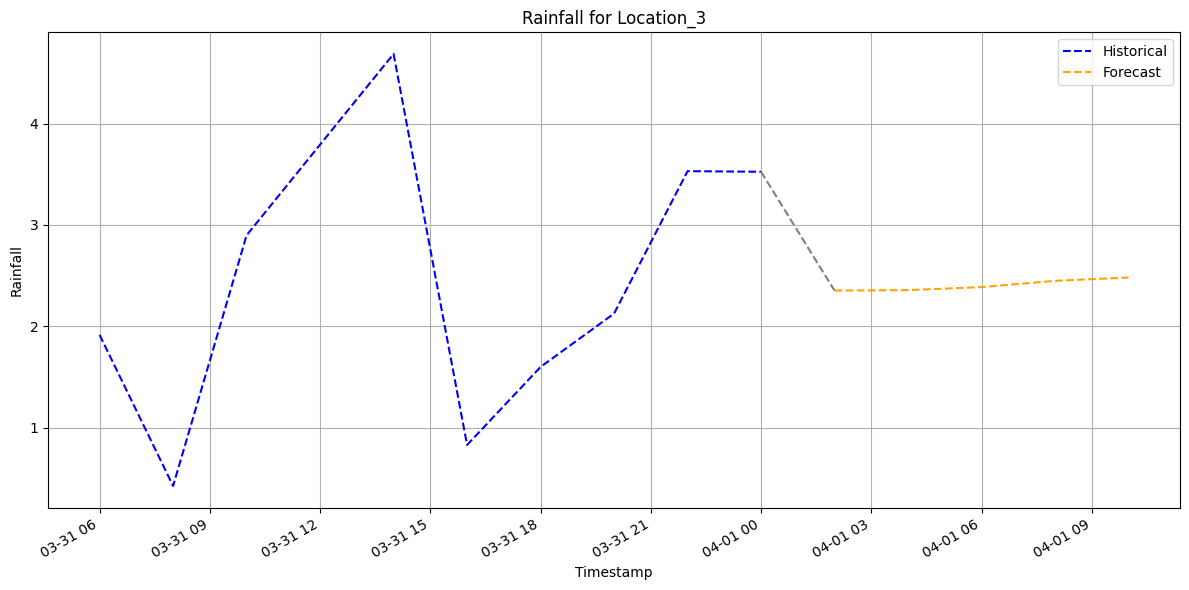

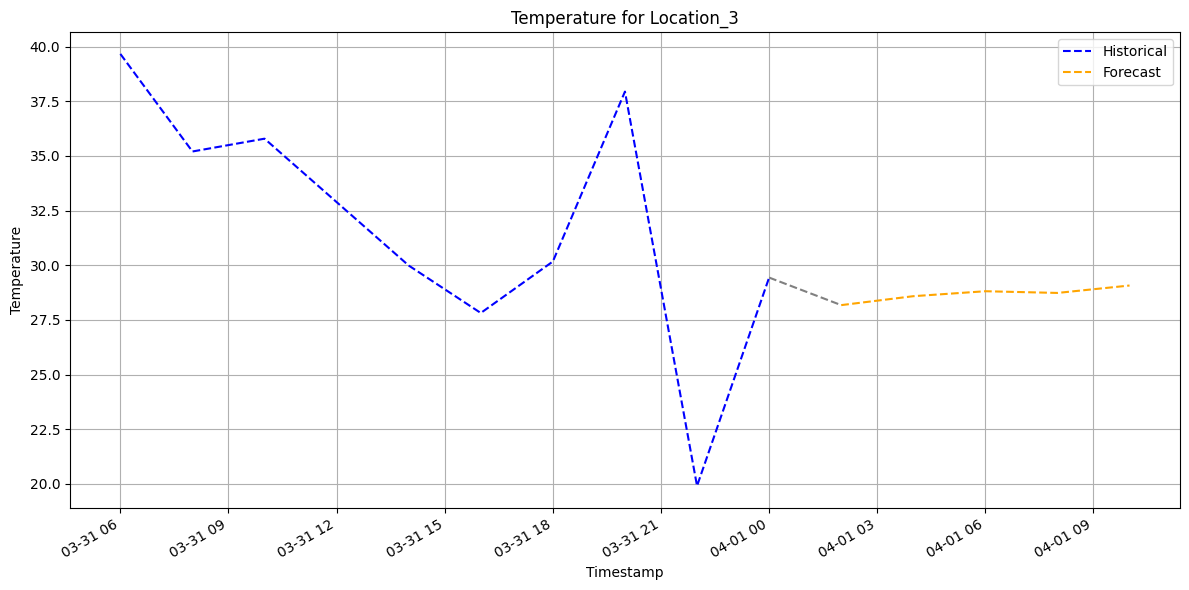

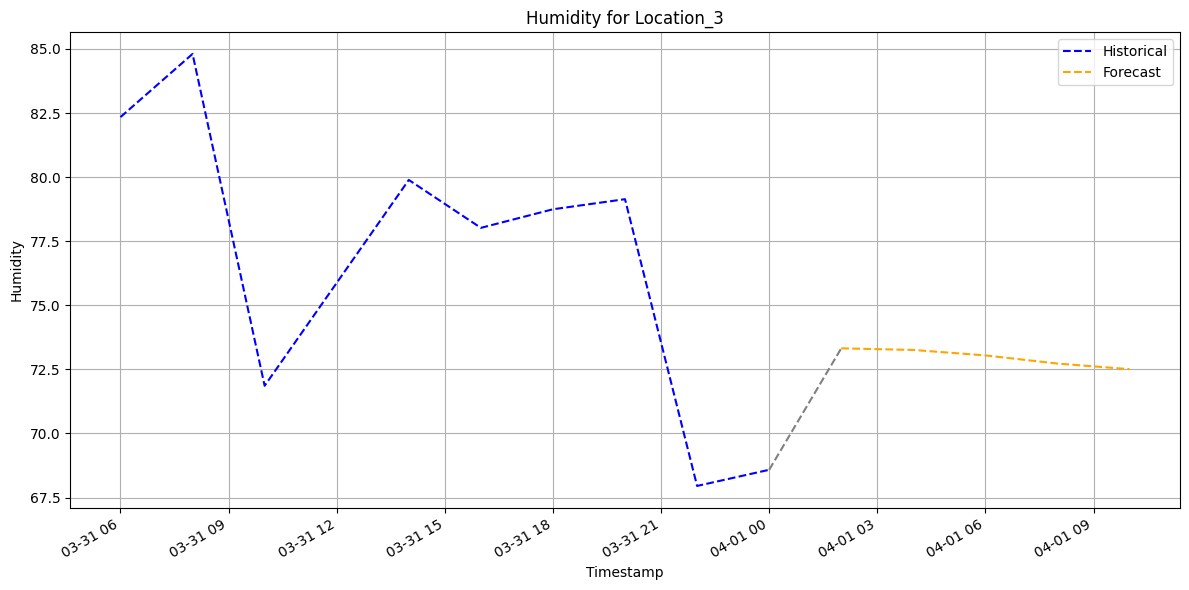

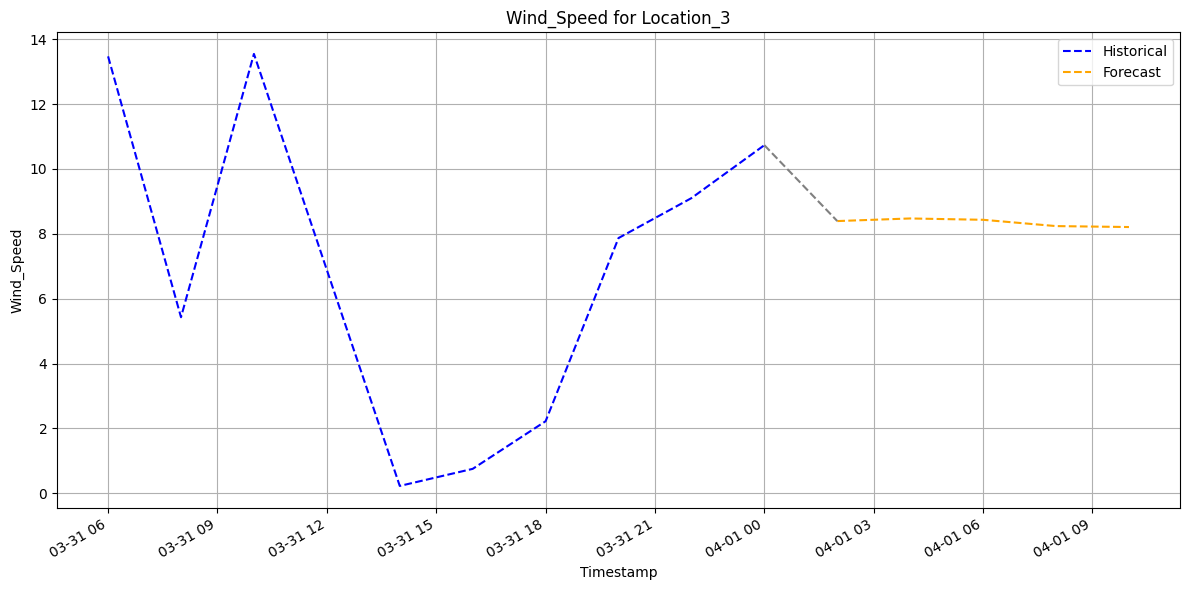

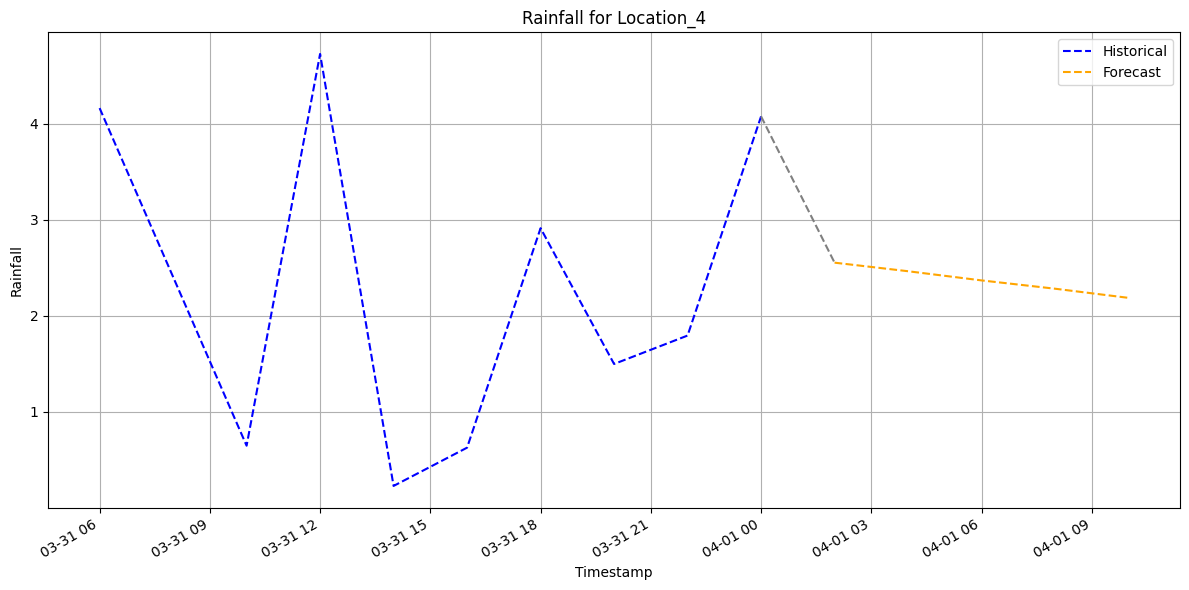

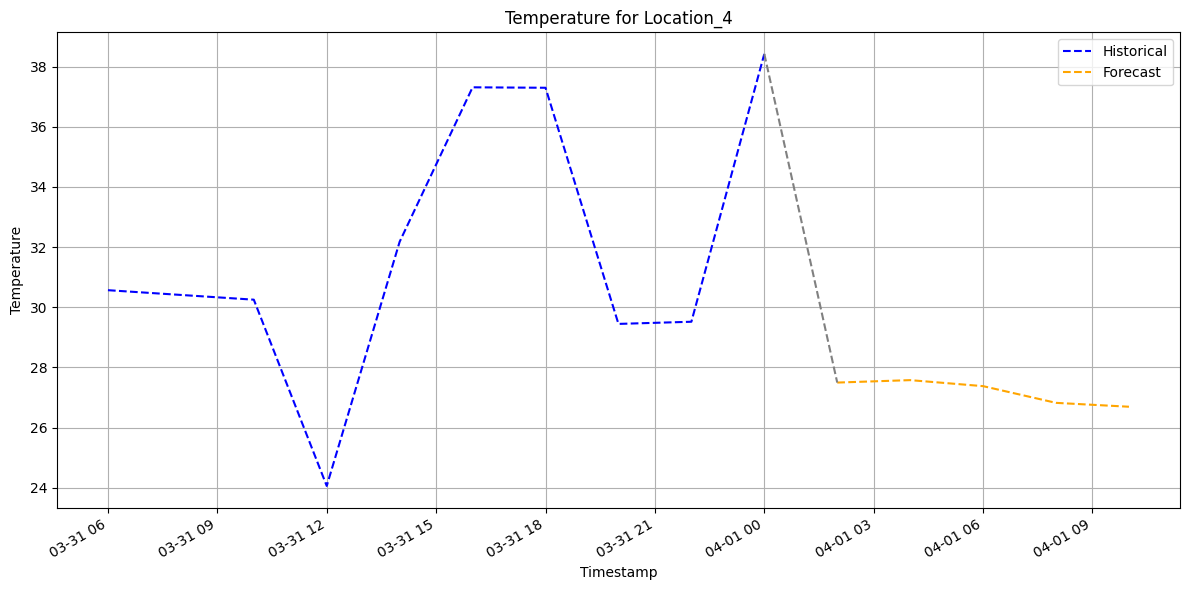

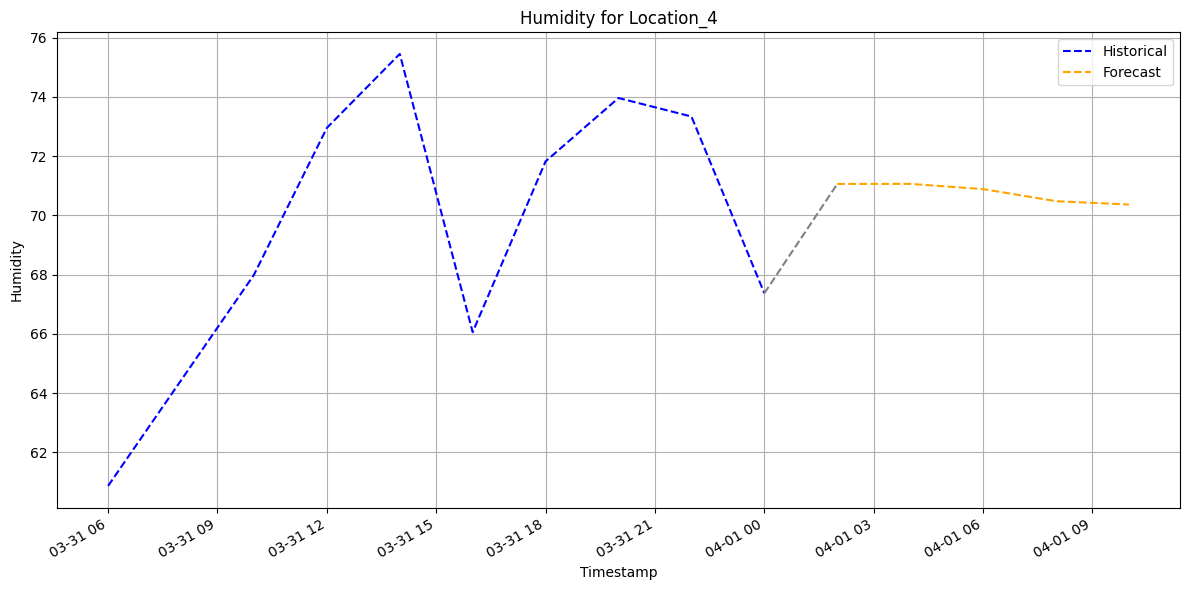

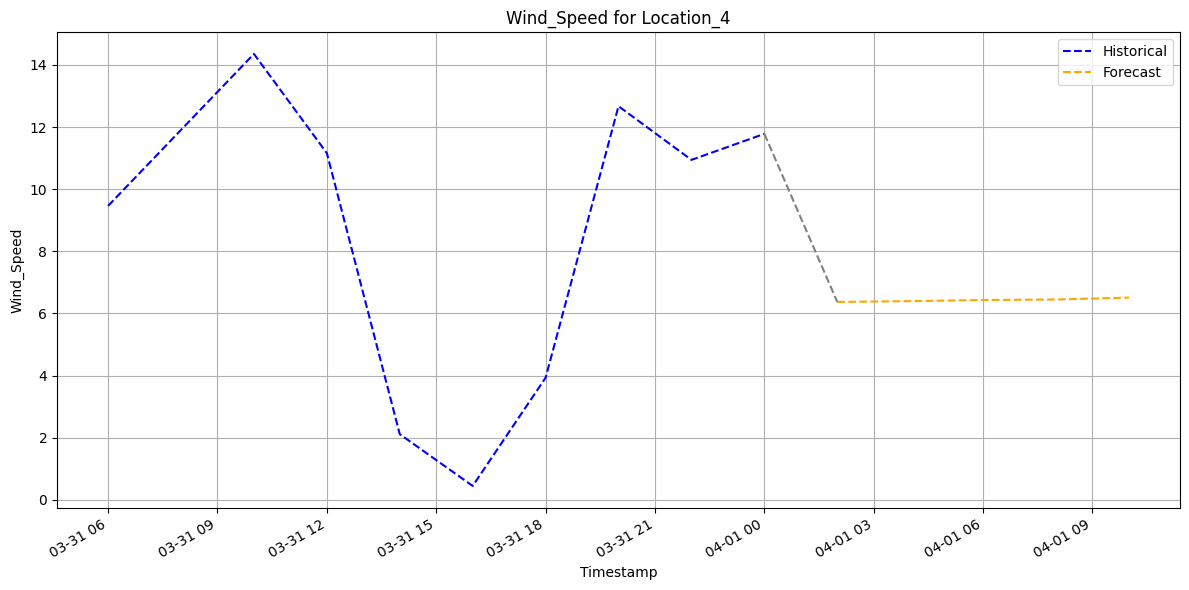

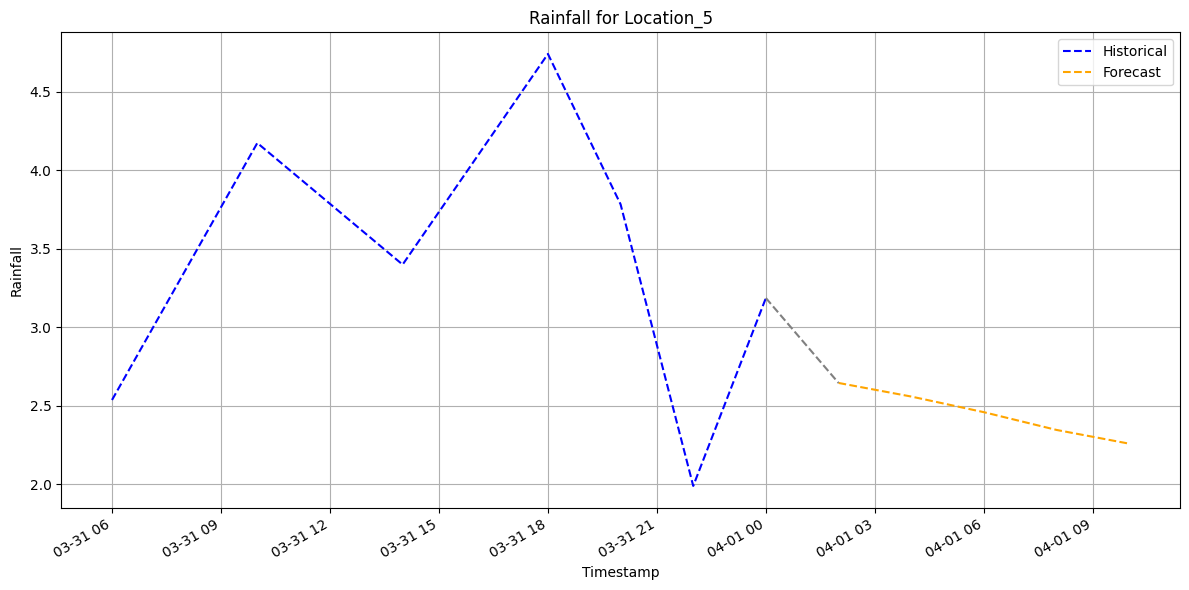

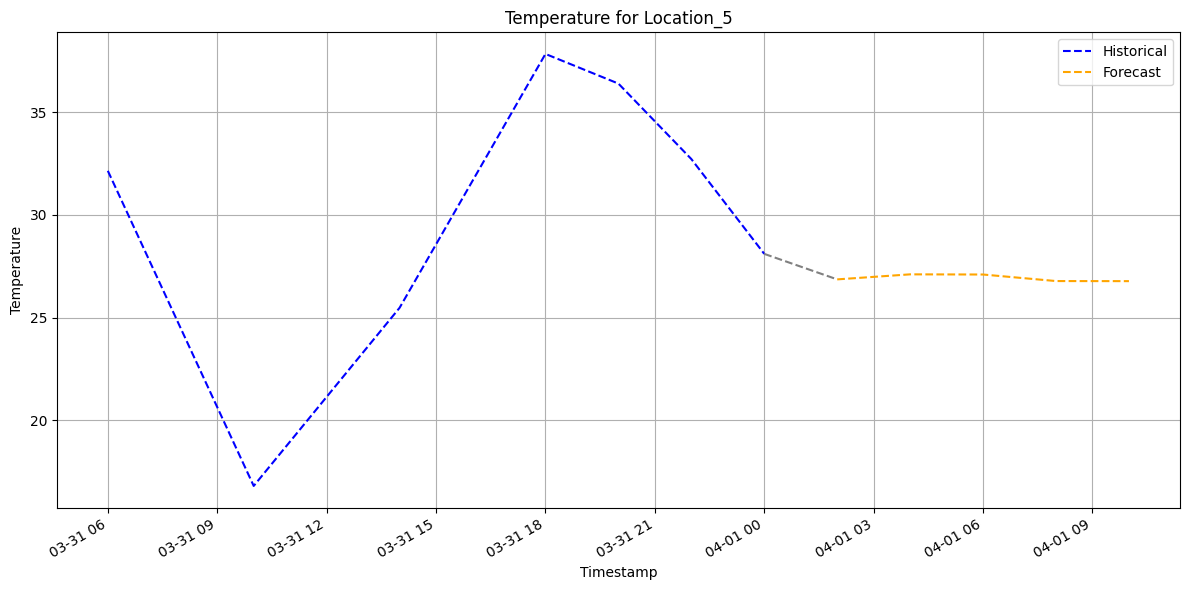

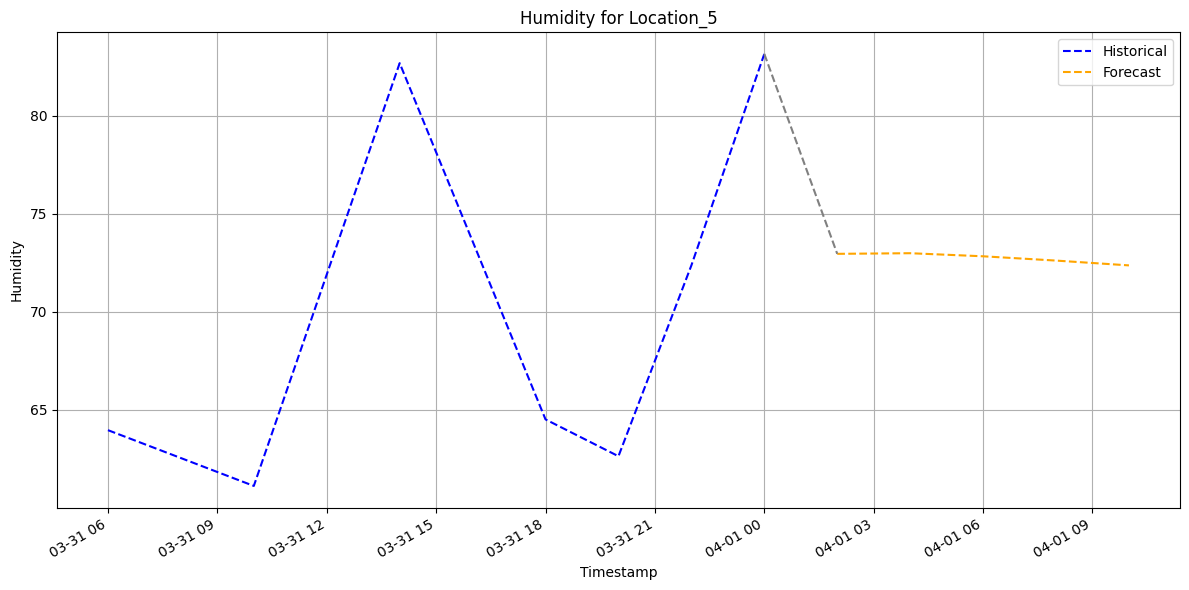

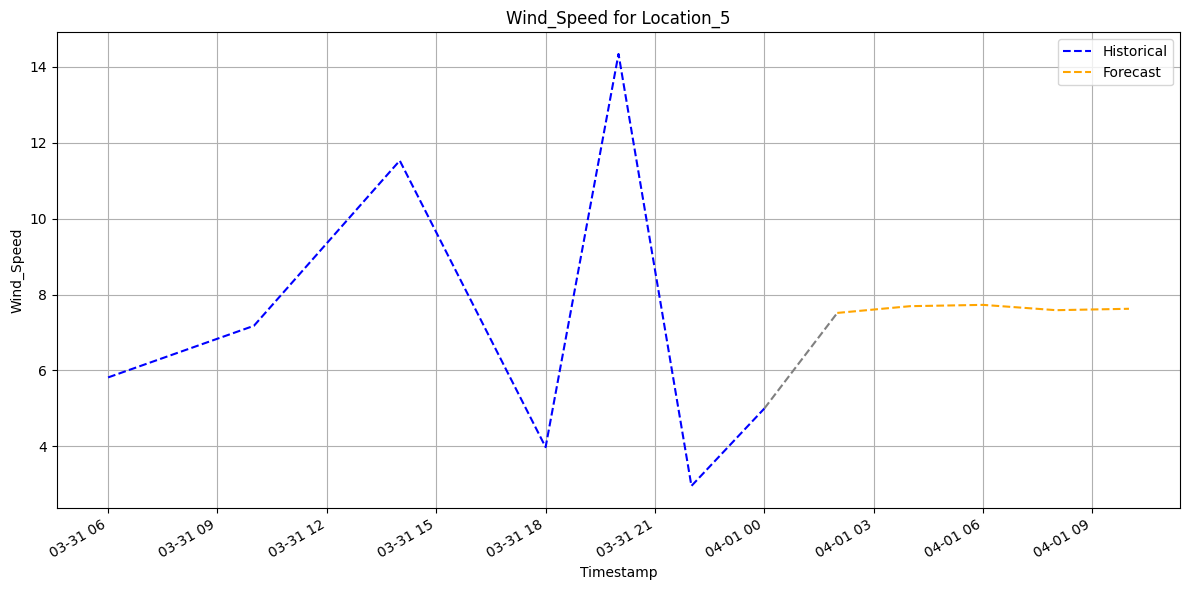

In [ ]:
locations = ['Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5']
features = ['Rainfall', 'Temperature', 'Humidity', 'Wind_Speed']
forecast_start_date = forecast_df['Timestamp'].min()

for location in locations:
    for feature in features:
        col_name = f'{location}_{feature}'

        if col_name not in df_with_timestamp.columns or col_name not in forecast_df.columns:
            print(f"Column {col_name} not found in dataframes")
            continue

        historical_data_last_100 = df_with_timestamp.tail(10)

        plt.figure(figsize=(12, 6))

        plt.plot(historical_data_last_100['Timestamp'], historical_data_last_100[col_name],
                 color='blue', linestyle='--', label='Historical')

        plt.plot(forecast_df['Timestamp'], forecast_df[col_name],
                 color='orange', linestyle='--', markersize=4, label='Forecast')

        if not historical_data_last_100.empty and not forecast_df.empty:
            plt.plot([historical_data_last_100['Timestamp'].iloc[-1], forecast_df['Timestamp'].iloc[0]],
                     [historical_data_last_100[col_name].iloc[-1], forecast_df[col_name].iloc[0]],
                     color='gray', linestyle='--')

        plt.title(f'{feature} for {location}')
        plt.xlabel('Timestamp')
        plt.ylabel(feature)
        plt.legend()
        plt.grid(True)

        plt.gcf().autofmt_xdate()

        plt.tight_layout()
        plt.show()


In [ ]:
threshold = 2.5
rainfall_message = "Forecasted Rainfall (Higher than normal):\n"
for index, row in forecast_df.iterrows():
    message_parts = []
    timestamp = row['Timestamp']
    message_parts.append(f"Timestamp: {timestamp}")
    for i in range(1, 6):
        rainfall_col = f'Location_{i}_Rainfall'
        rainfall_value = row[rainfall_col]
        if rainfall_value > threshold:
            message_parts.append(f"Location {i}: {rainfall_value:.2f} mm")

    if len(message_parts) > 1:
        rainfall_message += '\n'.join(message_parts) + '\n\n'




BOT_TOKEN = # Replace with your actual bot token  (message BOTfather in telegram its telegram's official api to create&maintain BOTS)
CHAT_ID =  # Replace with the chat ID of the user (can be found in this url https://api.telegram.org/bot<YOUR_TELEGRAM_BOT_TOKEN>/getUpdates)

def send_telegram_message(message):
    url = f'https://api.telegram.org/bot{BOT_TOKEN}/sendMessage'
    payload = {
        'chat_id': CHAT_ID,
        'text': message
    }
    response = requests.post(url, json=payload)
    if response.status_code == 200:
        print("Forecast sent successfully to Telegram!")
    else:
        print(f"Failed to send message. Status code: {response.status_code}")

# Send the message
try:
    send_telegram_message(rainfall_message)
except Exception as e:
    print(f"An error occurred while sending the message: {e}")

Forecast sent successfully to Telegram!
